In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_20052\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("features_MFCC_MEL_44100.csv")

In [3]:
data1 = data.loc[data['labels'] == 'anger'][:9786]
data2 = data.loc[data['labels'] == 'disgust'][:9786]
data3 = data.loc[data['labels'] == 'fear'][:9786]
data4 = data.loc[data['labels'] == 'happiness'][:9786]
data5 = data.loc[data['labels'] == 'neutral'][:9786]
data6 = data.loc[data['labels'] == 'sadness'][:9786]

In [4]:
total_data = pd.concat([data1, data2, data3, data4, data5, data6])

In [5]:
total_data.reset_index(inplace=False)

,index,0,1,2,3,4,5,6,7,8,...,139,140,141,142,143,144,145,146,147,labels
0,0,-434.397797,70.921379,-5.893759,8.323498,-14.905013,3.286163,-13.344301,-0.597952,-13.473495,...,0.000332,0.000184,0.000072,0.000066,0.000040,0.000025,0.000020,0.000009,1.422329e-06,anger
1,1,-433.233405,69.484132,-4.723213,7.360671,-14.052460,2.389644,-12.401154,-1.523313,-12.531225,...,0.000332,0.000184,0.000072,0.000066,0.000041,0.000025,0.000020,0.000010,1.586880e-06,anger
2,2,-504.409149,64.032059,-6.671339,1.925960,-15.027856,-0.607418,-11.239526,-1.876202,-7.441399,...,0.000061,0.000062,0.000060,0.000019,0.000013,0.000010,0.000006,0.000004,4.717677e-07,anger
3,3,-414.248047,71.440384,-12.586851,2.778891,-15.150665,9.575104,-14.859186,-9.263065,-13.070717,...,0.000260,0.000143,0.000062,0.000058,0.000034,0.000033,0.000024,0.000015,2.106240e-06,anger
4,4,-372.073164,43.540396,0.830944,-4.966355,-6.584886,2.662977,-5.120013,-11.467734,-3.761223,...,0.000348,0.000236,0.000155,0.000152,0.000123,0.000121,0.000114,0.000106,9.371953e-05,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58711,21397,-231.310210,40.606296,-8.829101,-15.342767,-12.852740,-9.463831,-13.842207,-12.394935,-4.872220,...,0.002786,0.002642,0.002785,0.002805,0.002732,0.002903,0.003020,0.003053,2.642826e-03,sadness
58712,21398,-416.042084,109.749496,-32.325413,-7.986904,-26.404966,-12.797280,-25.975826,-10.921155,2.190817,...,0.000011,0.000005,0.000005,0.000017,0.000021,0.000023,0.000018,0.000017,7.670854e-06,sadness
58713,21426,-334.852325,82.721710,-26.966780,0.950770,-10.807177,-2.245280,-6.572844,-10.666958,9.530412,...,0.000138,0.000113,0.000159,0.000176,0.000149,0.000163,0.000241,0.000348,6.666211e-05,sadness
58714,21427,-296.886569,52.509939,-15.865542,-3.330175,-6.160524,-3.553124,-6.509003,-7.561971,4.297037,...,0.000377,0.000371,0.000403,0.000432,0.000406,0.000406,0.000487,0.000591,3.229534e-04,sadness


In [6]:
X = total_data.iloc[: ,:-1].values
Y = total_data['labels'].values

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#케라스 불러오기
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization


In [8]:
# 다중 클래스 분류하기위해 Y설정
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
# 훈련데이터, 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148), (44037, 6), (14679, 148), (14679, 6))

In [10]:
# 훈련 및 테스트데이터 갯수 확인
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148), (44037, 6), (14679, 148), (14679, 6))

In [11]:
# 데이터의 차원 모델에 맞게 통일 
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148, 1), (44037, 6), (14679, 148, 1), (14679, 6))

In [12]:
x_train.shape[0]

44037

In [38]:
# version1 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.1929 - accuracy: 0.9375 - val_loss: 2.5998 - val_accuracy: 0.5308 - lr: 0.0010
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 148, 512)          3072      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 74, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 74, 256)           655616    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 37, 256)          0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 37, 256)           525312    
                                                                 
 conv1d_14 (Conv1D)          (None, 37, 128)          

In [39]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 17s 22ms/step - loss: 1.7220 - accuracy: 0.2368 - val_loss: 1.6322 - val_accuracy: 0.2999 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 15s 21ms/step - loss: 1.6341 - accuracy: 0.2947 - val_loss: 1.6008 - val_accuracy: 0.3154 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 15s 22ms/step - loss: 1.5984 - accuracy: 0.3153 - val_loss: 1.5692 - val_accuracy: 0.3265 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 15s 21ms/step - loss: 1.5710 - accuracy: 0.3305 - val_loss: 1.5575 - val_accuracy: 0.3276 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 15s 21ms/step - loss: 1.5488 - accuracy: 0.3407 - val_loss: 1.5201 - val_accuracy: 0.3581 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 15s 21ms/step - loss: 1.5273 - accuracy: 0.3506 - val_loss: 1.5090 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [40]:
model.save("sound_classifier_model_MFCC_MEL_44100(version1).h5")


459/459 [==============================] - 3s 7ms/step - loss: 2.5998 - accuracy: 0.5308
Accuracy of our model on test data :  53.08263301849365 %


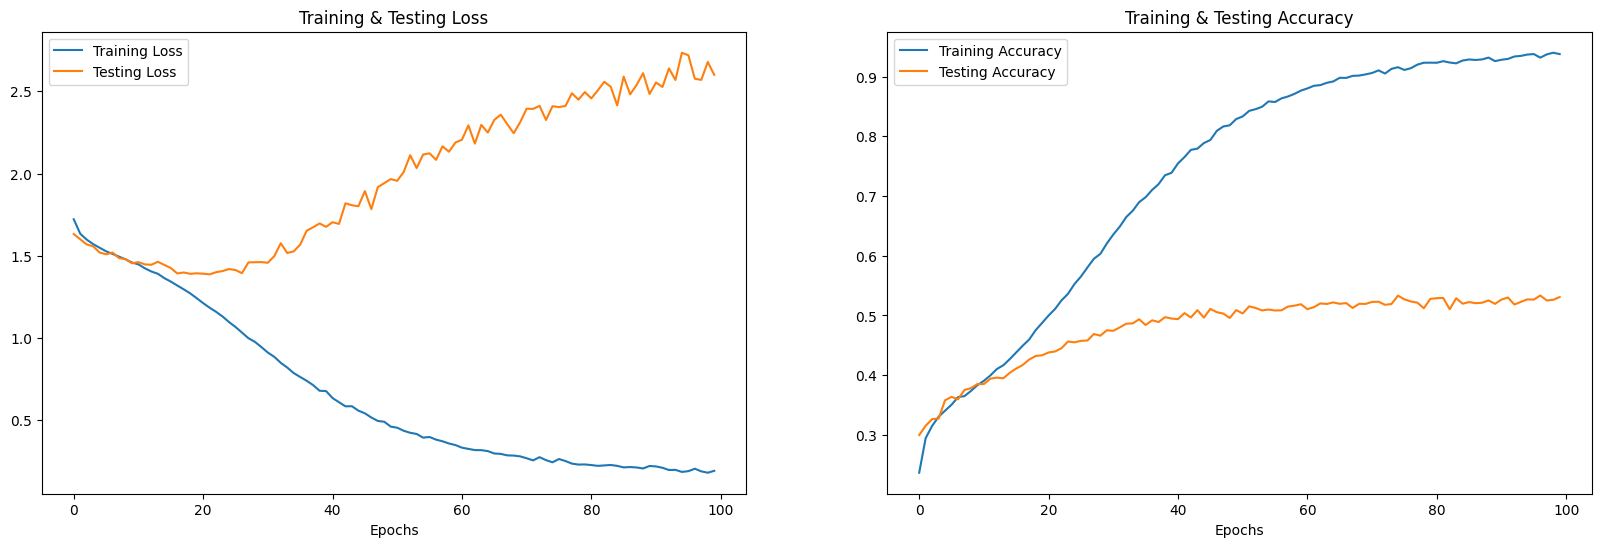

In [41]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [42]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 3s 6ms/step


In [43]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,sadness,sadness
1,happiness,happiness
2,fear,fear


In [44]:
import seaborn as sns

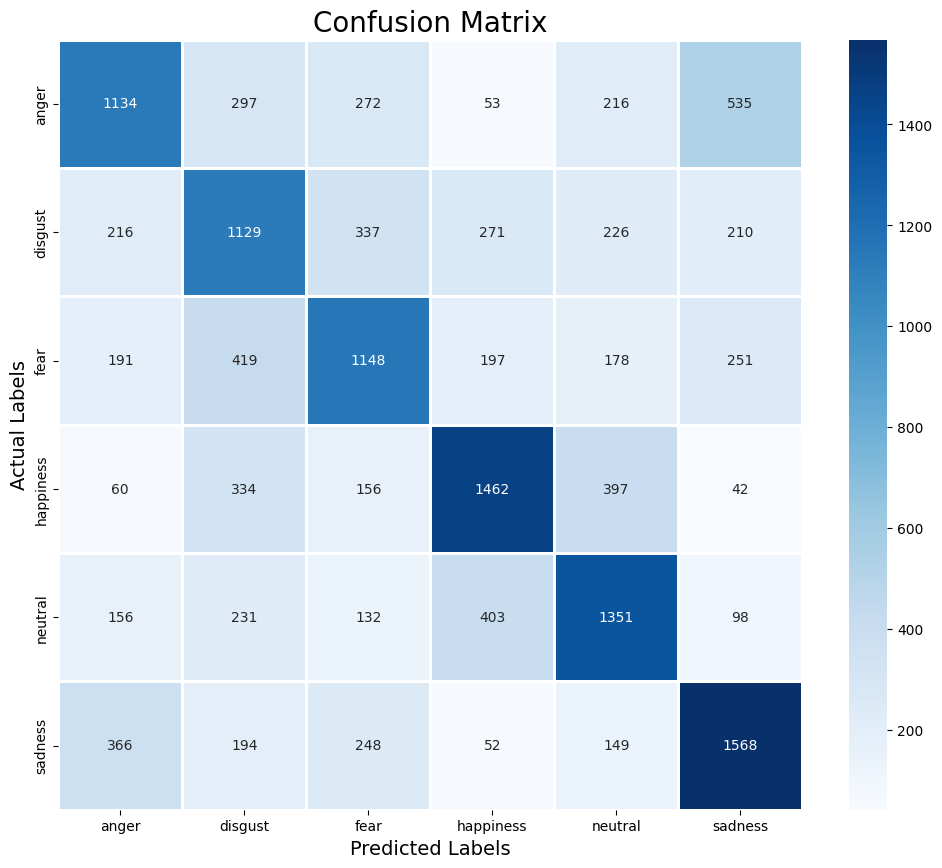

In [45]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [46]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.53      0.45      0.49      2507
     disgust       0.43      0.47      0.45      2389
        fear       0.50      0.48      0.49      2384
   happiness       0.60      0.60      0.60      2451
     neutral       0.54      0.57      0.55      2371
     sadness       0.58      0.61      0.59      2577

    accuracy                           0.53     14679
   macro avg       0.53      0.53      0.53     14679
weighted avg       0.53      0.53      0.53     14679



In [47]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 2s 14ms/step - loss: 2.5998 - accuracy: 0.5308


[2.59980845451355, 0.5308263301849365]

In [48]:
# version2 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.7202 - accuracy: 0.7184 - val_loss: 1.4646 - val_accuracy: 0.5265 - lr: 0.0010
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 148, 512)          3072      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 74, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 74, 256)           655616    
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 37, 256)          0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 37, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 37, 128)          

In [49]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 17s 21ms/step - loss: 1.7178 - accuracy: 0.2500 - val_loss: 1.6200 - val_accuracy: 0.3066 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 14s 20ms/step - loss: 1.6307 - accuracy: 0.2990 - val_loss: 1.5813 - val_accuracy: 0.3358 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 14s 21ms/step - loss: 1.5961 - accuracy: 0.3215 - val_loss: 1.5386 - val_accuracy: 0.3451 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 14s 21ms/step - loss: 1.5719 - accuracy: 0.3327 - val_loss: 1.5279 - val_accuracy: 0.3609 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 14s 20ms/step - loss: 1.5533 - accuracy: 0.3387 - val_loss: 1.5185 - val_accuracy: 0.3619 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 14s 20ms/step - loss: 1.5277 - accuracy: 0.3555 - val_loss: 1.5011 - val_accuracy: 0.3705 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [50]:
model.save("sound_classifier_model_MFCC_MEL_44100(version2).h5")


In [53]:
# version3 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.7838 - accuracy: 0.6727 - val_loss: 1.4829 - val_accuracy: 0.5468 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_6 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_6 (Flatten)         (None, 4736)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                151584    
                                                      

In [54]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 12s 15ms/step - loss: 1.6637 - accuracy: 0.2835 - val_loss: 1.5811 - val_accuracy: 0.3338 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 14ms/step - loss: 1.5871 - accuracy: 0.3267 - val_loss: 1.5384 - val_accuracy: 0.3574 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 14ms/step - loss: 1.5434 - accuracy: 0.3490 - val_loss: 1.4911 - val_accuracy: 0.3758 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 14ms/step - loss: 1.5129 - accuracy: 0.3654 - val_loss: 1.4695 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 10s 15ms/step - loss: 1.4823 - accuracy: 0.3763 - val_loss: 1.4375 - val_accuracy: 0.4052 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 14ms/step - loss: 1.4517 - accuracy: 0.3922 - val_loss: 1.4249 - val_accuracy: 0.4111 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [55]:
model.save("sound_classifier_model_MFCC_MEL_44100(version3).h5")


In [56]:
# version4 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.1296 - accuracy: 0.9608 - val_loss: 1.5828 - val_accuracy: 0.6834 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_7 (Flatten)         (None, 4736)              0         
                                                                 
 dense_14 (Dense)            (None, 1024)              4850688   
                                                      

In [57]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 12s 15ms/step - loss: 1.7059 - accuracy: 0.2531 - val_loss: 1.6068 - val_accuracy: 0.3165 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 11s 15ms/step - loss: 1.5972 - accuracy: 0.3210 - val_loss: 1.5214 - val_accuracy: 0.3682 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 15ms/step - loss: 1.5313 - accuracy: 0.3550 - val_loss: 1.4524 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 14ms/step - loss: 1.4760 - accuracy: 0.3784 - val_loss: 1.4289 - val_accuracy: 0.4022 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 11s 16ms/step - loss: 1.4308 - accuracy: 0.4044 - val_loss: 1.3857 - val_accuracy: 0.4171 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 15ms/step - loss: 1.3756 - accuracy: 0.4270 - val_loss: 1.3616 - val_accuracy: 0.4355 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [58]:
model.save("sound_classifier_model_MFCC_MEL_44100(version4).h5")


459/459 [==============================] - 3s 6ms/step - loss: 1.5812 - accuracy: 0.6821
Accuracy of our model on test data :  68.20628046989441 %


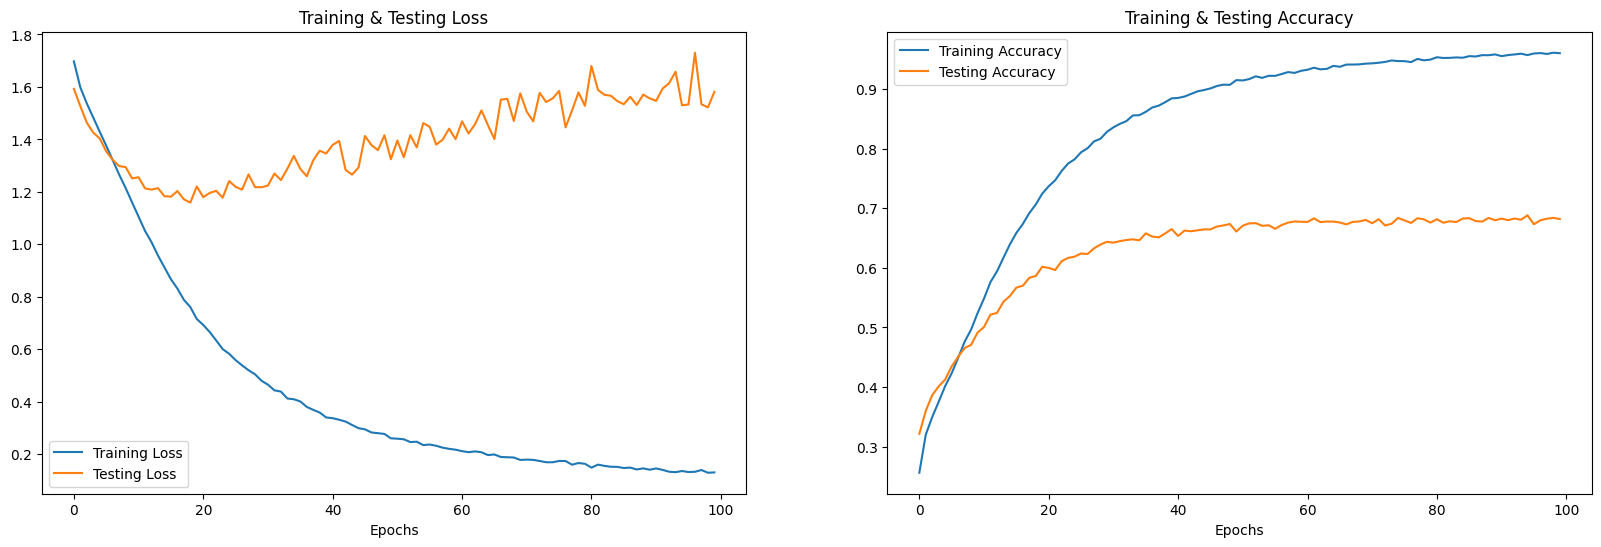

In [35]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 2s 4ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,sadness,sadness
1,fear,happiness
2,fear,fear


In [38]:
import seaborn as sns

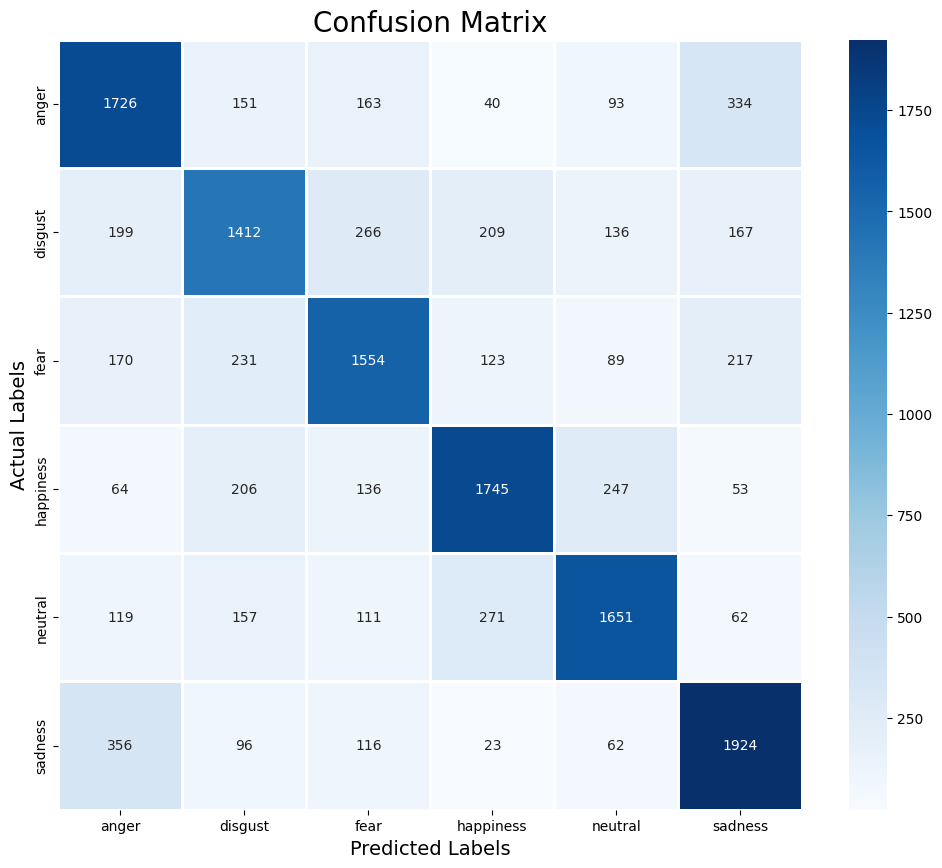

In [39]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [40]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.66      0.69      0.67      2507
     disgust       0.63      0.59      0.61      2389
        fear       0.66      0.65      0.66      2384
   happiness       0.72      0.71      0.72      2451
     neutral       0.72      0.70      0.71      2371
     sadness       0.70      0.75      0.72      2577

    accuracy                           0.68     14679
   macro avg       0.68      0.68      0.68     14679
weighted avg       0.68      0.68      0.68     14679



In [41]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 8ms/step - loss: 1.5812 - accuracy: 0.6821


[1.58119797706604, 0.6820628046989441]

In [59]:
# version5 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 1.7917 - accuracy: 0.1684 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 1.0000e-07
model=Sequential()
model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 148, 1024)         6144      
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 74, 1024)         0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 74, 512)           2621952   
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 37, 512)          0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 37, 256)           787456    
                                                                 
 conv1d_27 (Conv1D)          (None, 37, 128)          

In [60]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 30s 40ms/step - loss: 1.7912 - accuracy: 0.1692 - val_loss: 1.7911 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 27s 39ms/step - loss: 1.7919 - accuracy: 0.1642 - val_loss: 1.7920 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 27s 39ms/step - loss: 1.7918 - accuracy: 0.1674 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 27s 39ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 27s 39ms/step - loss: 1.7918 - accuracy: 0.1660 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 27s 39ms/step - loss: 1.7918 - accuracy: 0.1672 - val_loss: 1.7920 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [61]:
model.save("sound_classifier_model_MFCC_MEL_44100(version5).h5")


In [62]:
# version6 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 1.7917 - accuracy: 0.1684 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 1.0000e-07
model=Sequential()
model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 148, 1024)         6144      
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 74, 1024)         0         
 g1D)                                                            
                                                                 
 conv1d_30 (Conv1D)          (None, 74, 512)           2621952   
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 37, 512)          0         
 g1D)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 37, 256)           787456    
                                                                 
 conv1d_31 (Conv1D)          (None, 37, 128)          

In [63]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 30s 42ms/step - loss: 1.7925 - accuracy: 0.1694 - val_loss: 1.7921 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 28s 41ms/step - loss: 1.7919 - accuracy: 0.1673 - val_loss: 1.7919 - val_accuracy: 0.1670 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 28s 41ms/step - loss: 1.7919 - accuracy: 0.1665 - val_loss: 1.7923 - val_accuracy: 0.1627 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 28s 41ms/step - loss: 1.7919 - accuracy: 0.1674 - val_loss: 1.7922 - val_accuracy: 0.1627 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 28s 40ms/step - loss: 1.7918 - accuracy: 0.1674 - val_loss: 1.7922 - val_accuracy: 0.1624 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 28s 41ms/step - loss: 1.7918 - accuracy: 0.1692 - val_loss: 1.7921 - val_accuracy: 0.1624 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [64]:
model.save("sound_classifier_model_MFCC_MEL_44100(version6).h5")


In [71]:
# version7 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.4762 - accuracy: 0.8436 - val_loss: 1.3134 - val_accuracy: 0.6386 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_49 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_15 (LSTM)              (None, 74, 64)            49408     
                                                                 
 flatten_15 (Flatten)        (None, 4736)              0         
                                                                 
 dense_57 (Dense)            (None, 1024)              4850688   
                                                     

In [72]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 17s 18ms/step - loss: 1.7925 - accuracy: 0.1780 - val_loss: 1.7603 - val_accuracy: 0.2311 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 11s 16ms/step - loss: 1.7149 - accuracy: 0.2478 - val_loss: 1.6625 - val_accuracy: 0.3037 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6550 - accuracy: 0.2841 - val_loss: 1.6224 - val_accuracy: 0.3103 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6201 - accuracy: 0.3006 - val_loss: 1.5719 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 11s 16ms/step - loss: 1.5913 - accuracy: 0.3172 - val_loss: 1.5423 - val_accuracy: 0.3469 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 11s 16ms/step - loss: 1.5621 - accuracy: 0.3324 - val_loss: 1.5154 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [73]:
model.save("sound_classifier_model_MFCC_MEL_44100(version7).h5")


In [74]:
# version8 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# 
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_50 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_63 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 74, 64)            49408     
                                                                 
 flatten_16 (Flatten)        (None, 4736)              0         
                                                                 
 dense_63 (Dense)            (None, 2048)              9701376   
                                                     

In [75]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 15s 19ms/step - loss: 1.7951 - accuracy: 0.1720 - val_loss: 1.7798 - val_accuracy: 0.1591 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 12s 18ms/step - loss: 1.7241 - accuracy: 0.2384 - val_loss: 1.6220 - val_accuracy: 0.2907 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 12s 18ms/step - loss: 1.6508 - accuracy: 0.2835 - val_loss: 1.5971 - val_accuracy: 0.3267 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 12s 18ms/step - loss: 1.6171 - accuracy: 0.2991 - val_loss: 1.5716 - val_accuracy: 0.3342 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 12s 18ms/step - loss: 1.5965 - accuracy: 0.3072 - val_loss: 1.5528 - val_accuracy: 0.3364 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 12s 18ms/step - loss: 1.5759 - accuracy: 0.3142 - val_loss: 1.5529 - val_accuracy: 0.3381 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [76]:
model.save("sound_classifier_model_MFCC_MEL_44100(version8).h5")


In [42]:
# version9 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.4611 - accuracy: 0.8454 - val_loss: 1.3712 - val_accuracy: 0.6355 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 148, 128)          768       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 74, 128)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_2 (Flatten)         (None, 4736)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              4850688   
                                                      

In [43]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 11s 14ms/step - loss: 1.7629 - accuracy: 0.2043 - val_loss: 1.6672 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6712 - accuracy: 0.2737 - val_loss: 1.6128 - val_accuracy: 0.2956 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6264 - accuracy: 0.2951 - val_loss: 1.5739 - val_accuracy: 0.3225 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 9s 13ms/step - loss: 1.5992 - accuracy: 0.3092 - val_loss: 1.5344 - val_accuracy: 0.3395 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 9s 13ms/step - loss: 1.5713 - accuracy: 0.3260 - val_loss: 1.5109 - val_accuracy: 0.3498 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 9s 13ms/step - loss: 1.5468 - accuracy: 0.3348 - val_loss: 1.5032 - val_accuracy: 0.3577 - lr: 0.0010
Epoch 7/100
689/689 [==============================] - 9s

In [44]:
model.save("sound_classifier_model_MFCC_MEL_44100(version9).h5")


In [45]:
# version10 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.0132 - accuracy: 0.9963 - val_loss: 3.5567 - val_accuracy: 0.6886 - lr: 4.0000e-04
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 148, 128)          768       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 74, 128)          0         
 1D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_3 (Flatten)         (None, 4736)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              4850688   
                                                      

In [46]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 13s 16ms/step - loss: 1.6742 - accuracy: 0.2714 - val_loss: 1.5677 - val_accuracy: 0.3435 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 14ms/step - loss: 1.5630 - accuracy: 0.3412 - val_loss: 1.5288 - val_accuracy: 0.3617 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 14ms/step - loss: 1.4878 - accuracy: 0.3760 - val_loss: 1.4482 - val_accuracy: 0.3991 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 14ms/step - loss: 1.4164 - accuracy: 0.4065 - val_loss: 1.3837 - val_accuracy: 0.4258 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 10s 14ms/step - loss: 1.3413 - accuracy: 0.4441 - val_loss: 1.3615 - val_accuracy: 0.4341 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 14ms/step - loss: 1.2624 - accuracy: 0.4737 - val_loss: 1.3207 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

459/459 [==============================] - 3s 7ms/step - loss: 3.5566 - accuracy: 0.6886
Accuracy of our model on test data :  68.86027455329895 %


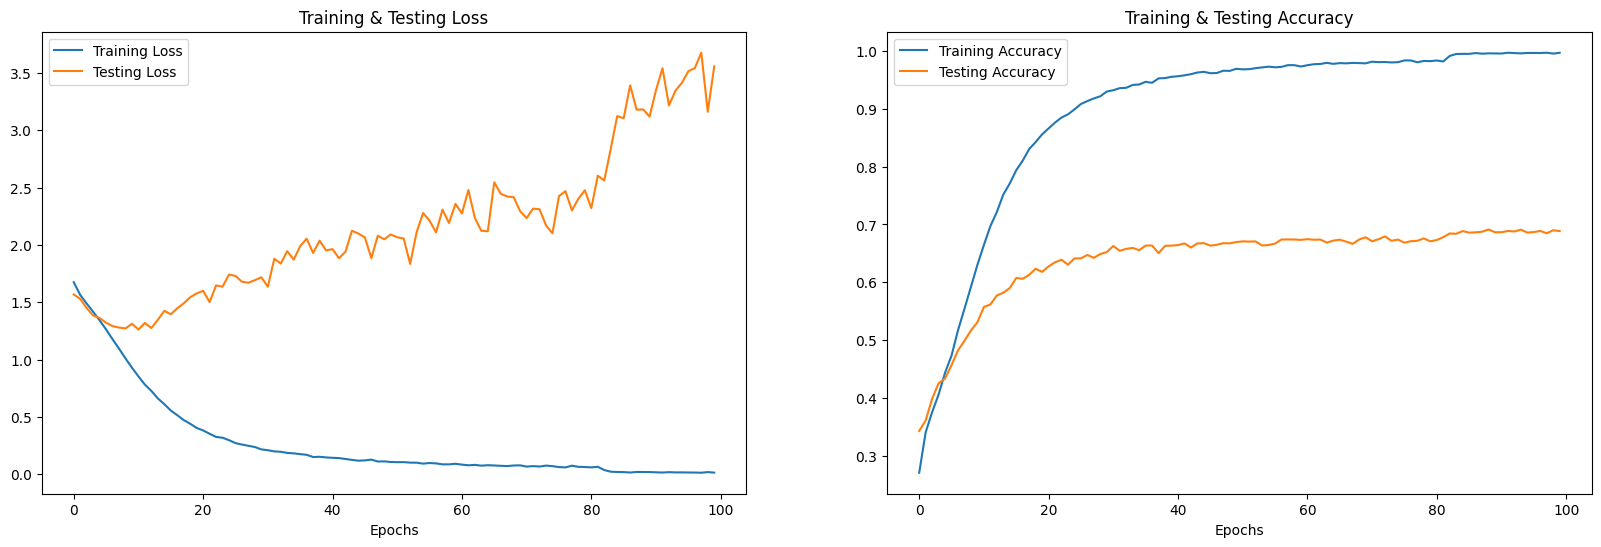

In [47]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [48]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 2s 5ms/step


In [49]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,anger,sadness
1,fear,happiness
2,fear,fear


In [50]:
import seaborn as sns

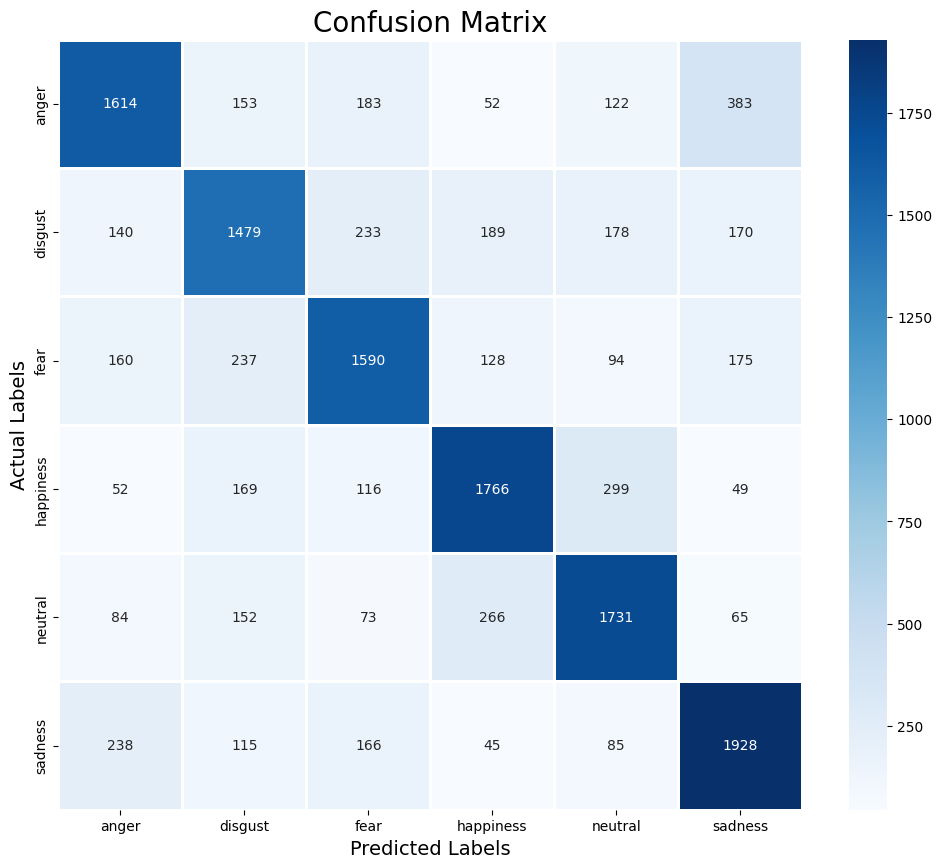

In [51]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [52]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.71      0.64      0.67      2507
     disgust       0.64      0.62      0.63      2389
        fear       0.67      0.67      0.67      2384
   happiness       0.72      0.72      0.72      2451
     neutral       0.69      0.73      0.71      2371
     sadness       0.70      0.75      0.72      2577

    accuracy                           0.69     14679
   macro avg       0.69      0.69      0.69     14679
weighted avg       0.69      0.69      0.69     14679



In [53]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 7ms/step - loss: 3.5567 - accuracy: 0.6886


[3.556668758392334, 0.6886027455329895]

In [54]:
model.save("sound_classifier_model_MFCC_MEL_44100(version10).h5")


In [13]:
# version11 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# 
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 128)          768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 74, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 128)           0         
                                                                 
 lstm (LSTM)                 (None, 74, 64)            49408     
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 32)            10272     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 32)           0         
 1D)                                                    

In [14]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 18s 15ms/step - loss: 1.6932 - accuracy: 0.2579 - val_loss: 1.6015 - val_accuracy: 0.3170 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 14ms/step - loss: 1.6103 - accuracy: 0.3104 - val_loss: 1.5579 - val_accuracy: 0.3290 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 9s 14ms/step - loss: 1.5664 - accuracy: 0.3333 - val_loss: 1.5193 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 14ms/step - loss: 1.5309 - accuracy: 0.3485 - val_loss: 1.4963 - val_accuracy: 0.3680 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 9s 14ms/step - loss: 1.4969 - accuracy: 0.3699 - val_loss: 1.4814 - val_accuracy: 0.3724 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 14ms/step - loss: 1.4643 - accuracy: 0.3842 - val_loss: 1.4602 - val_accuracy: 0.3880 - lr: 0.0010
Epoch 7/100
689/689 [==============================] -

In [15]:
model.save("sound_classifier_model_MFCC_MEL_44100(version11).h5")


In [20]:
# version12 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.1862 - accuracy: 0.9430 - val_loss: 1.9283 - val_accuracy: 0.6729 - lr: 1.6000e-04
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 148, 128)          768       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 74, 128)          0         
 1D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_3 (Flatten)         (None, 4736)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              4850688   
                                                      

In [21]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 12s 15ms/step - loss: 1.7956 - accuracy: 0.1714 - val_loss: 1.7921 - val_accuracy: 0.1627 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 10s 14ms/step - loss: 1.7774 - accuracy: 0.1902 - val_loss: 1.7270 - val_accuracy: 0.2555 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 10s 14ms/step - loss: 1.6929 - accuracy: 0.2592 - val_loss: 1.6381 - val_accuracy: 0.3091 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 9s 13ms/step - loss: 1.6476 - accuracy: 0.2838 - val_loss: 1.5782 - val_accuracy: 0.3158 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 9s 14ms/step - loss: 1.6170 - accuracy: 0.3005 - val_loss: 1.5716 - val_accuracy: 0.3270 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 9s 14ms/step - loss: 1.5928 - accuracy: 0.3096 - val_loss: 1.5326 - val_accuracy: 0.3413 - lr: 0.0010
Epoch 7/200
689/689 [==============================] - 

459/459 [==============================] - 3s 6ms/step - loss: 1.9283 - accuracy: 0.6729
Accuracy of our model on test data :  67.29341149330139 %


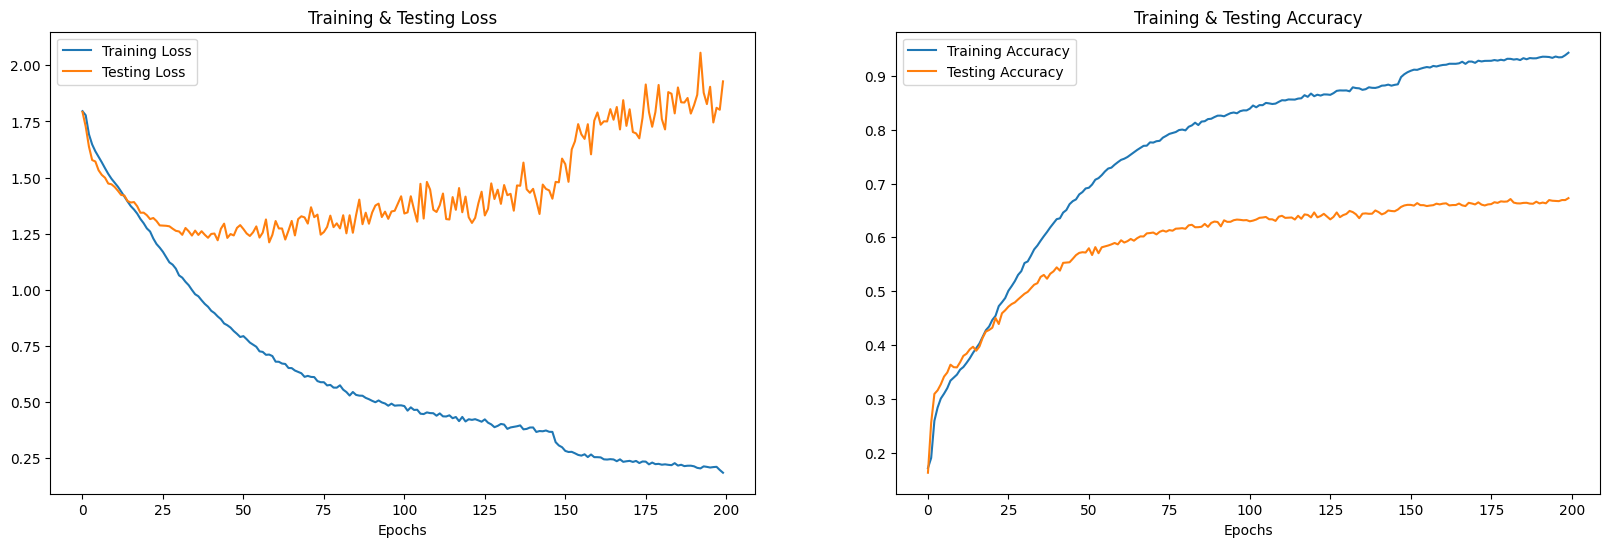

In [25]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [26]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 3s 5ms/step


In [27]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,sadness,sadness
1,happiness,happiness
2,fear,fear


In [28]:
import seaborn as sns

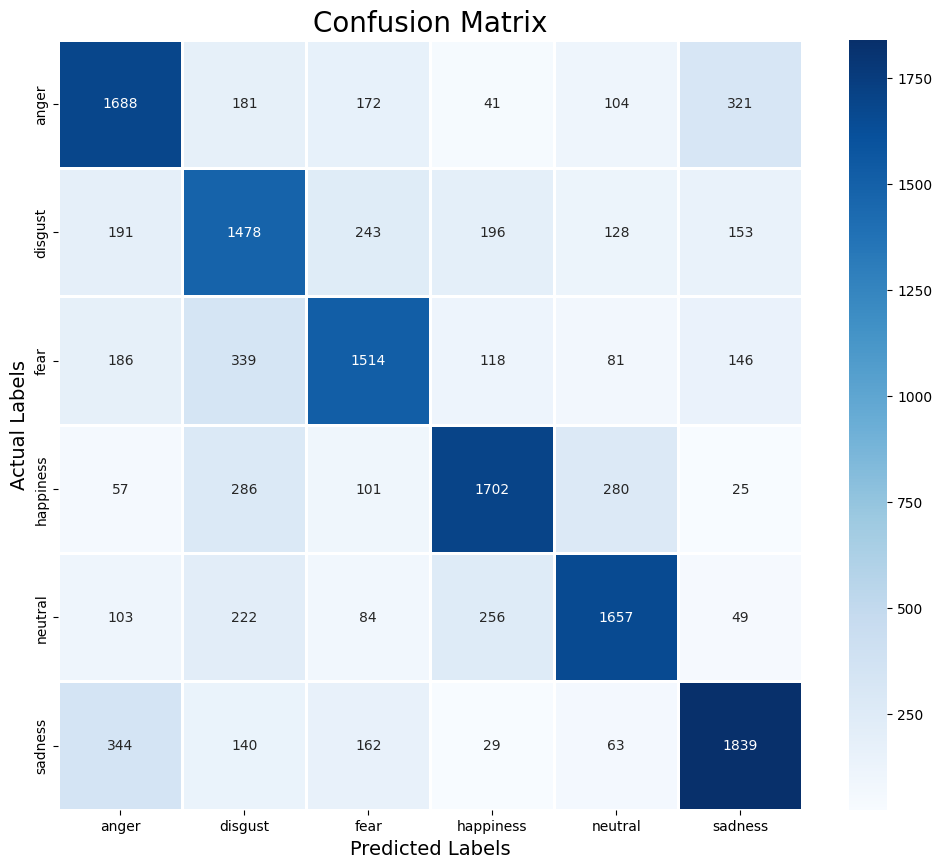

In [29]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [30]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.66      0.67      0.67      2507
     disgust       0.56      0.62      0.59      2389
        fear       0.67      0.64      0.65      2384
   happiness       0.73      0.69      0.71      2451
     neutral       0.72      0.70      0.71      2371
     sadness       0.73      0.71      0.72      2577

    accuracy                           0.67     14679
   macro avg       0.67      0.67      0.67     14679
weighted avg       0.68      0.67      0.67     14679



In [32]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 8ms/step - loss: 1.9283 - accuracy: 0.6729


[1.9283314943313599, 0.6728659868240356]

In [31]:
model.save("sound_classifier_model_MFCC_MEL_44100(version12).h5")


In [33]:
# version13 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.1702 - accuracy: 0.9471 - val_loss: 2.1889 - val_accuracy: 0.6785 - lr: 6.4000e-05
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 148, 128)          768       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 74, 128)          0         
 1D)                                                             
                                                                 
 dropout_22 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 74, 64)            49408     
                                                                 
 flatten_4 (Flatten)         (None, 4736)              0         
                                                                 
 dense_24 (Dense)            (None, 2048)              9701376   
                                                      

In [34]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 13s 16ms/step - loss: 1.7952 - accuracy: 0.1673 - val_loss: 1.7866 - val_accuracy: 0.1901 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 11s 16ms/step - loss: 1.7382 - accuracy: 0.2302 - val_loss: 1.6329 - val_accuracy: 0.2910 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 11s 16ms/step - loss: 1.6625 - accuracy: 0.2757 - val_loss: 1.6223 - val_accuracy: 0.3034 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 11s 16ms/step - loss: 1.6223 - accuracy: 0.2949 - val_loss: 1.5633 - val_accuracy: 0.3197 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 11s 16ms/step - loss: 1.5985 - accuracy: 0.3020 - val_loss: 1.5643 - val_accuracy: 0.3277 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 11s 16ms/step - loss: 1.5821 - accuracy: 0.3089 - val_loss: 1.5448 - val_accuracy: 0.3320 - lr: 0.0010
Epoch 7/200
689/689 [==============================]

459/459 [==============================] - 3s 6ms/step - loss: 2.1889 - accuracy: 0.6785
Accuracy of our model on test data :  67.845219373703 %


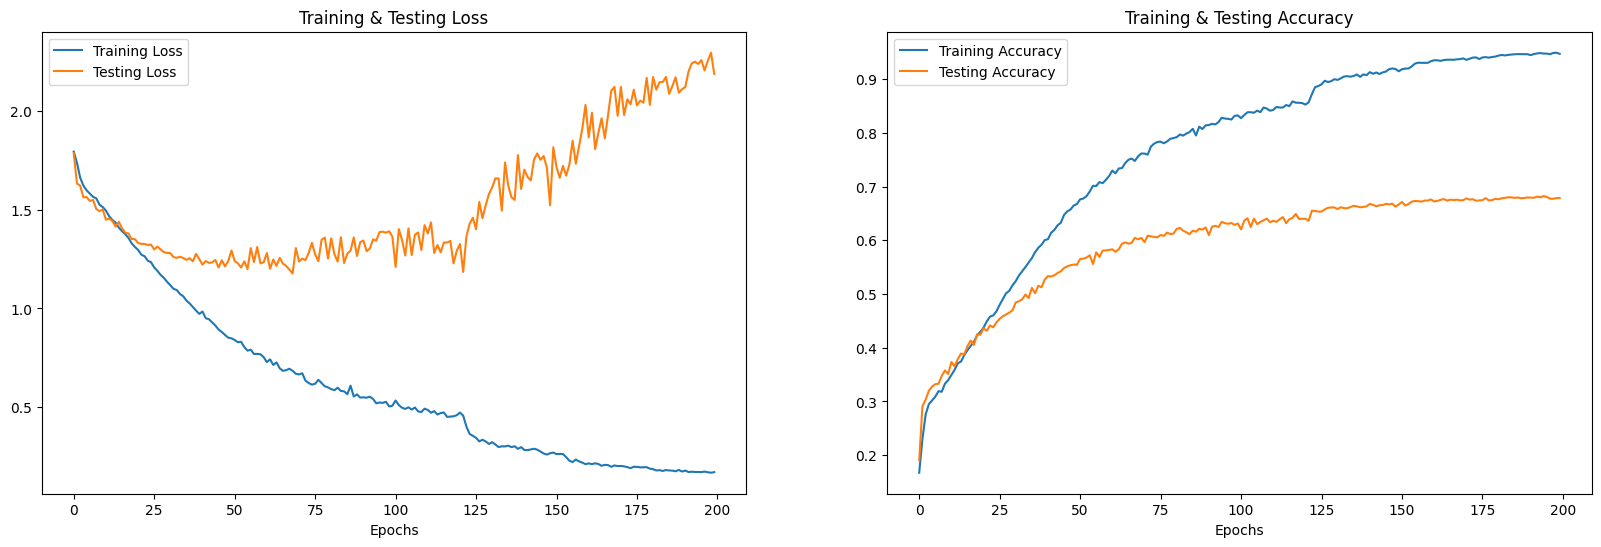

In [35]:

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 3s 5ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,anger,sadness
1,happiness,happiness
2,fear,fear


In [38]:
import seaborn as sns

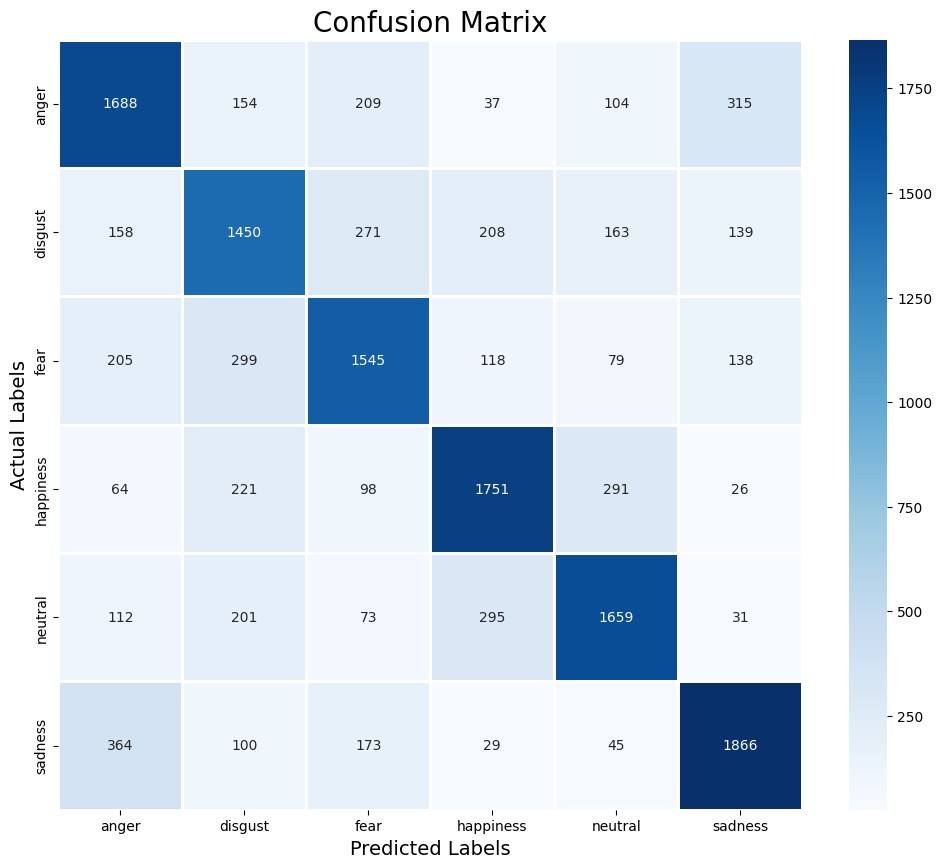

In [39]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [40]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.65      0.67      0.66      2507
     disgust       0.60      0.61      0.60      2389
        fear       0.65      0.65      0.65      2384
   happiness       0.72      0.71      0.72      2451
     neutral       0.71      0.70      0.70      2371
     sadness       0.74      0.72      0.73      2577

    accuracy                           0.68     14679
   macro avg       0.68      0.68      0.68     14679
weighted avg       0.68      0.68      0.68     14679



In [41]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 7ms/step - loss: 2.1889 - accuracy: 0.6785


[2.1888933181762695, 0.67845219373703]

In [42]:
model.save("sound_classifier_model_MFCC_MEL_44100(version13).h5")


In [54]:
# version14 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.4227 - accuracy: 0.8509 - val_loss: 1.6683 - val_accuracy: 0.6068 - lr: 4.0000e-04
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))




model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_76 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_13 (LSTM)              (None, 74, 64)            49408     
                                                                 
 conv1d_38 (Conv1D)          (None, 74, 32)            10272     
                                                                 
 max_pooling1d_38 (MaxPoolin  (None, 37, 32)           0         
 g1D)                                                

In [55]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 12s 14ms/step - loss: 1.7495 - accuracy: 0.2168 - val_loss: 1.6958 - val_accuracy: 0.2682 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 10s 14ms/step - loss: 1.6917 - accuracy: 0.2617 - val_loss: 1.6445 - val_accuracy: 0.2884 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 9s 14ms/step - loss: 1.6638 - accuracy: 0.2770 - val_loss: 1.6345 - val_accuracy: 0.2912 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 9s 14ms/step - loss: 1.6311 - accuracy: 0.2928 - val_loss: 1.5931 - val_accuracy: 0.3256 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 9s 13ms/step - loss: 1.6152 - accuracy: 0.3037 - val_loss: 1.5852 - val_accuracy: 0.3267 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 10s 14ms/step - loss: 1.5959 - accuracy: 0.3155 - val_loss: 1.5713 - val_accuracy: 0.3380 - lr: 0.0010
Epoch 7/200
689/689 [==============================] - 

459/459 [==============================] - 3s 6ms/step - loss: 1.6683 - accuracy: 0.6068
Accuracy of our model on test data :  60.67851781845093 %


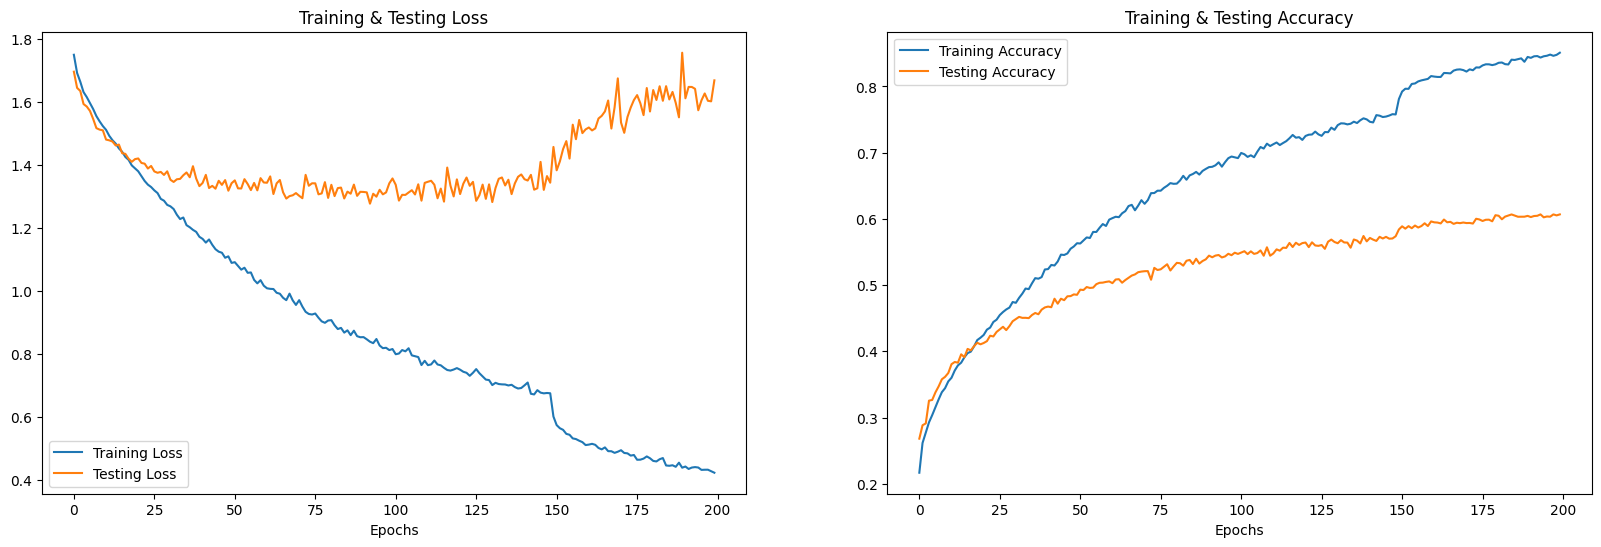

In [56]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [57]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 3s 6ms/step


In [58]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,sadness,sadness
1,happiness,happiness
2,disgust,fear


In [59]:
import seaborn as sns

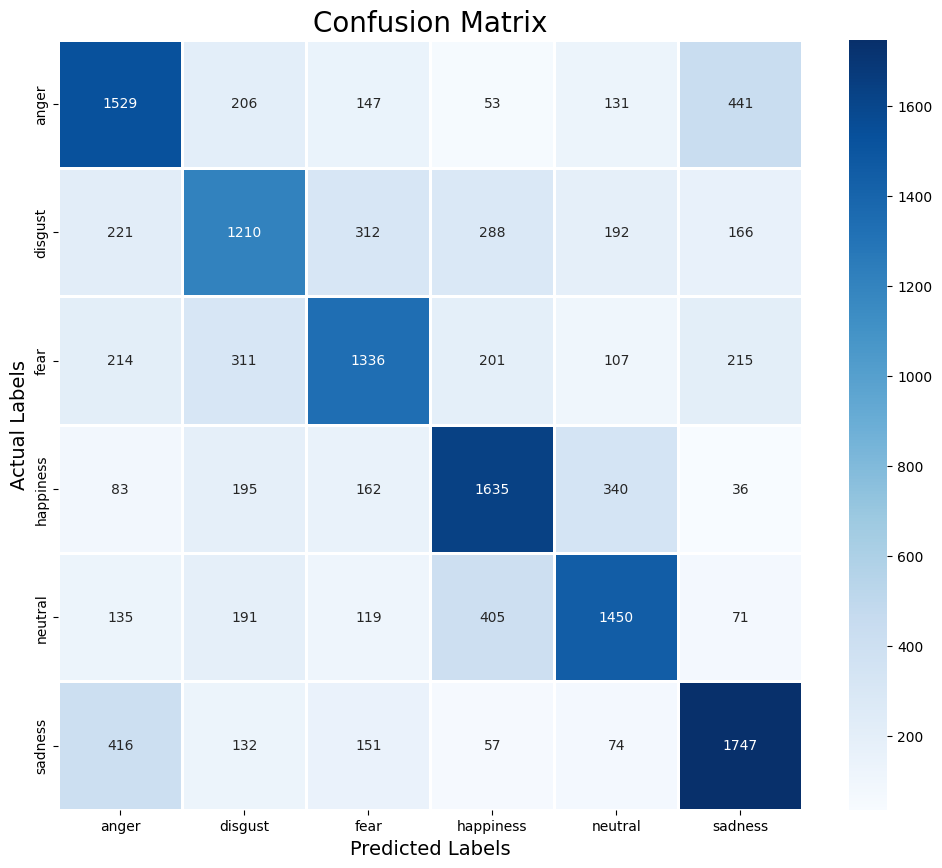

In [60]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.59      0.61      0.60      2507
     disgust       0.54      0.51      0.52      2389
        fear       0.60      0.56      0.58      2384
   happiness       0.62      0.67      0.64      2451
     neutral       0.63      0.61      0.62      2371
     sadness       0.65      0.68      0.67      2577

    accuracy                           0.61     14679
   macro avg       0.61      0.61      0.60     14679
weighted avg       0.61      0.61      0.61     14679



In [62]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 8ms/step - loss: 1.6683 - accuracy: 0.6068


[1.6683108806610107, 0.6067851781845093]

In [63]:
model.save("sound_classifier_model_MFCC_MEL_44100(version14).h5")


In [64]:
# version15 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.2073 - accuracy: 0.9304 - val_loss: 2.2865 - val_accuracy: 0.6010 - lr: 4.0000e-04
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_39 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_39 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 74, 64)            49408     
                                                                 
 conv1d_40 (Conv1D)          (None, 74, 32)            10272     
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 37, 32)           0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1184)            

In [65]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 11s 15ms/step - loss: 1.7325 - accuracy: 0.2277 - val_loss: 1.6675 - val_accuracy: 0.2888 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 9s 14ms/step - loss: 1.6445 - accuracy: 0.2894 - val_loss: 1.5828 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 10s 15ms/step - loss: 1.6035 - accuracy: 0.3136 - val_loss: 1.5706 - val_accuracy: 0.3292 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 10s 15ms/step - loss: 1.5752 - accuracy: 0.3290 - val_loss: 1.5588 - val_accuracy: 0.3440 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 10s 14ms/step - loss: 1.5503 - accuracy: 0.3399 - val_loss: 1.5086 - val_accuracy: 0.3582 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 9s 13ms/step - loss: 1.5265 - accuracy: 0.3520 - val_loss: 1.4955 - val_accuracy: 0.3583 - lr: 0.0010
Epoch 7/200
689/689 [==============================] -

In [66]:
model.save("sound_classifier_model_MFCC_MEL_44100(version15).h5")


In [69]:
# version16 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.0856 - accuracy: 0.9762 - val_loss: 1.8540 - val_accuracy: 0.6773 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_94 (Dropout)        (None, 74, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 74, 64)            49408     
                                                                 
 flatten_18 (Flatten)        (None, 4736)              0         
                                                                 
 dense_91 (Dense)            (None, 1024)              4850688   
                                                     

In [70]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.8, verbose=0, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 13s 16ms/step - loss: 1.6944 - accuracy: 0.2590 - val_loss: 1.6224 - val_accuracy: 0.3072 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 11s 16ms/step - loss: 1.5906 - accuracy: 0.3222 - val_loss: 1.5136 - val_accuracy: 0.3648 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 10s 15ms/step - loss: 1.5345 - accuracy: 0.3511 - val_loss: 1.4854 - val_accuracy: 0.3738 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 10s 15ms/step - loss: 1.4879 - accuracy: 0.3733 - val_loss: 1.4378 - val_accuracy: 0.3932 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 10s 15ms/step - loss: 1.4372 - accuracy: 0.4008 - val_loss: 1.3936 - val_accuracy: 0.4158 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 10s 14ms/step - loss: 1.3866 - accuracy: 0.4231 - val_loss: 1.3689 - val_accuracy: 0.4325 - lr: 0.0010
Epoch 7/200
689/689 [==============================]

In [71]:
model.save("sound_classifier_model_MFCC_MEL_44100(version16).h5")


In [74]:
# version17 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.1141 - accuracy: 0.9641 - val_loss: 1.3122 - val_accuracy: 0.6908 - lr: 0.0010
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_44 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_105 (Dropout)       (None, 74, 128)           0         
                                                                 
 lstm_18 (LSTM)              (None, 74, 64)            49408     
                                                                 
 flatten_20 (Flatten)        (None, 4736)              0         
                                                                 
 dense_103 (Dense)           (None, 1024)              4850688   
                                                     

In [75]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.8, verbose=0, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 11s 14ms/step - loss: 1.6740 - accuracy: 0.2719 - val_loss: 1.5831 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 9s 13ms/step - loss: 1.5758 - accuracy: 0.3276 - val_loss: 1.5297 - val_accuracy: 0.3658 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 9s 13ms/step - loss: 1.5230 - accuracy: 0.3540 - val_loss: 1.4716 - val_accuracy: 0.3818 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 9s 13ms/step - loss: 1.4780 - accuracy: 0.3798 - val_loss: 1.4274 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 9s 13ms/step - loss: 1.4309 - accuracy: 0.4013 - val_loss: 1.4085 - val_accuracy: 0.4068 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 9s 14ms/step - loss: 1.3876 - accuracy: 0.4244 - val_loss: 1.3753 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 7/200
689/689 [==============================] - 9s

459/459 [==============================] - 3s 6ms/step - loss: 1.3122 - accuracy: 0.6909
Accuracy of our model on test data :  69.08508539199829 %


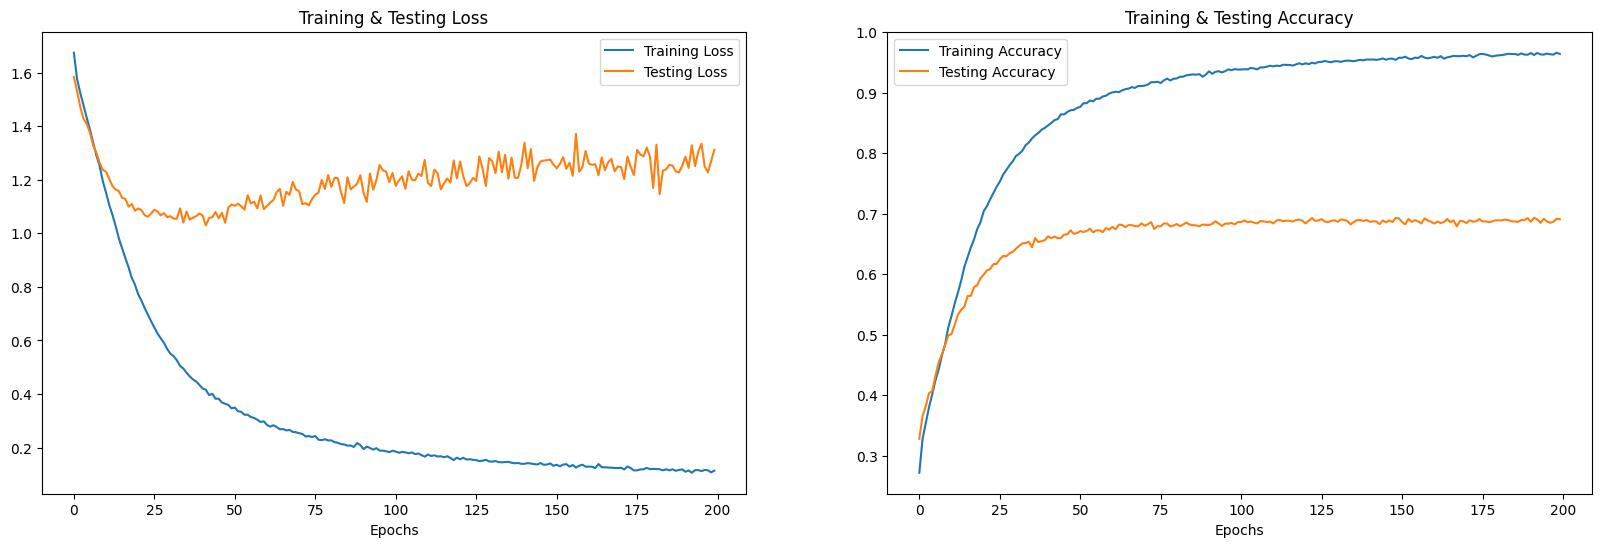

In [76]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [77]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 3s 5ms/step


In [78]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,sadness,sadness
1,fear,happiness
2,fear,fear


In [79]:
import seaborn as sns

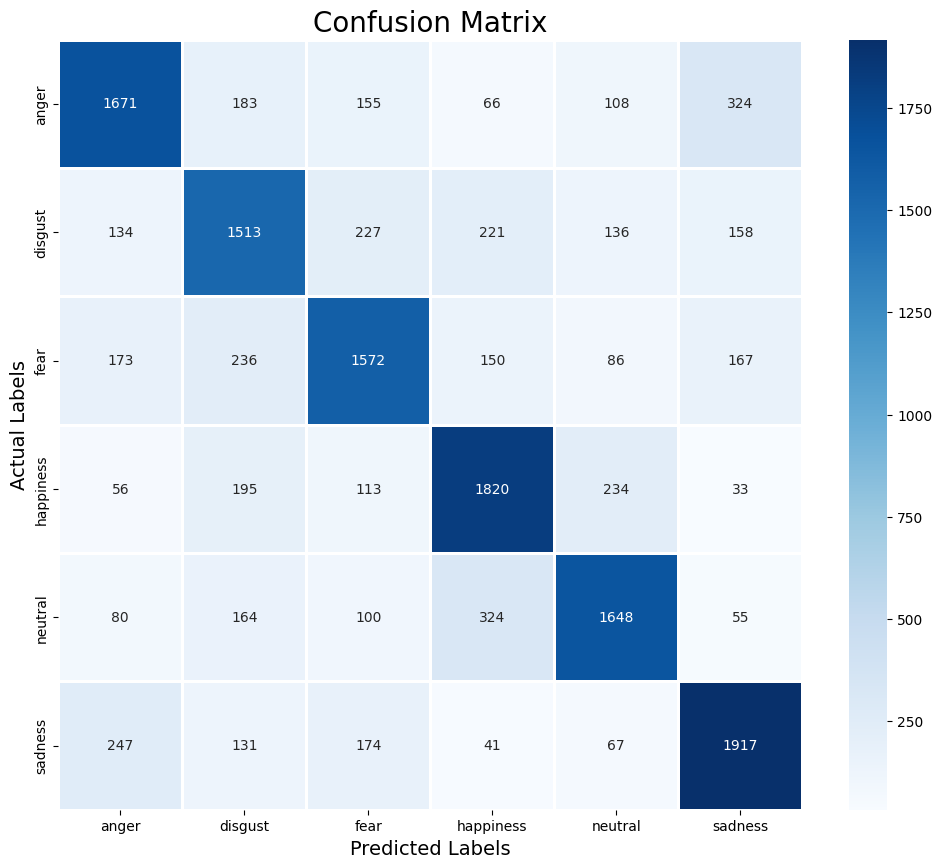

In [80]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [81]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.71      0.67      0.69      2507
     disgust       0.62      0.63      0.63      2389
        fear       0.67      0.66      0.67      2384
   happiness       0.69      0.74      0.72      2451
     neutral       0.72      0.70      0.71      2371
     sadness       0.72      0.74      0.73      2577

    accuracy                           0.69     14679
   macro avg       0.69      0.69      0.69     14679
weighted avg       0.69      0.69      0.69     14679



In [82]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 7ms/step - loss: 1.3122 - accuracy: 0.6908


[1.3122221231460571, 0.6907827258110046]

In [83]:
model.save("sound_classifier_model_MFCC_MEL_44100(version17).h5")


In [84]:
# version18 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# 
model=Sequential()
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 148, 128)          768       
                                                                 
 max_pooling1d_45 (MaxPoolin  (None, 74, 128)          0         
 g1D)                                                            
                                                                 
 dropout_110 (Dropout)       (None, 74, 128)           0         
                                                                 
 lstm_19 (LSTM)              (None, 74, 64)            49408     
                                                                 
 conv1d_46 (Conv1D)          (None, 74, 64)            20544     
                                                                 
 max_pooling1d_46 (MaxPoolin  (None, 37, 64)           0         
 g1D)                                                

In [85]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.8, verbose=0, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
689/689 [==============================] - 12s 15ms/step - loss: 1.6794 - accuracy: 0.2716 - val_loss: 1.6003 - val_accuracy: 0.3267 - lr: 0.0010
Epoch 2/200
689/689 [==============================] - 10s 14ms/step - loss: 1.5960 - accuracy: 0.3178 - val_loss: 1.5382 - val_accuracy: 0.3505 - lr: 0.0010
Epoch 3/200
689/689 [==============================] - 10s 14ms/step - loss: 1.5539 - accuracy: 0.3384 - val_loss: 1.5386 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 4/200
689/689 [==============================] - 10s 14ms/step - loss: 1.5185 - accuracy: 0.3556 - val_loss: 1.4938 - val_accuracy: 0.3683 - lr: 0.0010
Epoch 5/200
689/689 [==============================] - 10s 14ms/step - loss: 1.4894 - accuracy: 0.3702 - val_loss: 1.4720 - val_accuracy: 0.3830 - lr: 0.0010
Epoch 6/200
689/689 [==============================] - 10s 14ms/step - loss: 1.4572 - accuracy: 0.3873 - val_loss: 1.4583 - val_accuracy: 0.3895 - lr: 0.0010
Epoch 7/200
689/689 [==============================]